In [29]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [11]:
vals = [json.loads(line) for line in open('results/bot_results_new_style.txt')]
df = pd.DataFrame(vals)

df = df.assign(
    guesser = lambda dataframe: dataframe['guesser'].map(lambda guesser: guesser[guesser.index('.')+1:-2]),
    codemaster = lambda dataframe: dataframe['codemaster'].map(lambda codemaster: codemaster[codemaster.index('.')+1:-2])

).drop('cm_kwargs', axis=1).drop('g_kwargs', axis=1).drop('game_name',axis=1)
print("Average turns for 8 tiles: ",df['total_turns'].mean())

df

Average turns for 8 tiles:  19.623529411764707


,total_turns,R,B,C,A,codemaster,guesser,seed,time_s
0,25,2,0,0,1,codemaster_wn_lin.AICodemaster,guesser_w2vglove.AIGuesser,1.653947e+09,1.653947e+09
1,8,8,0,0,0,codemaster_w2vglove_05.AICodemaster,guesser_glove.AIGuesser,1.653947e+09,1.653947e+09
2,8,8,0,0,0,codemaster_glove_05.AICodemaster,vector_guesser.VectorGuesser,1.653947e+09,1.653947e+09
3,8,8,0,0,0,codemaster_wn_lin.AICodemaster,guesser_wn_jcn.AIGuesser,1.653947e+09,1.653947e+09
4,25,7,6,9,1,codemaster_glove_05.AICodemaster,guesser_wn_jcn.AIGuesser,1.653947e+09,1.653947e+09
...,...,...,...,...,...,...,...,...,...
250,25,7,7,6,0,codemaster_random.AICodemaster,guesser_random.AIGuesser,1.654545e+09,1.654545e+09
251,25,1,2,0,1,codemaster_random.AICodemaster,guesser_wn_lch.AIGuesser,1.654545e+09,1.654545e+09
252,25,5,4,4,1,codemaster_glove_05.AICodemaster,guesser_random.AIGuesser,1.654545e+09,1.654545e+09
253,25,0,3,2,1,codemaster_gpt3.AICodemaster,guesser_wn_lch.AIGuesser,1.654545e+09,1.654545e+09


In [12]:
df.groupby('guesser')['total_turns'].mean()

guesser
guesser.HumanGuesser            25.000000
guesser_glove.AIGuesser         16.360000
guesser_gpt3.AIGuesser          21.000000
guesser_random.AIGuesser        24.615385
guesser_w2v.AIGuesser           17.291667
guesser_w2vglove.AIGuesser      15.909091
guesser_wn_jcn.AIGuesser        20.363636
guesser_wn_lch.AIGuesser        21.555556
guesser_wn_lin.AIGuesser        21.181818
guesser_wn_path.AIGuesser       20.800000
guesser_wn_res.AIGuesser        21.000000
guesser_wn_wup.AIGuesser        20.705882
vector_guesser.VectorGuesser    14.650000
Name: total_turns, dtype: float64

In [13]:
print(df.groupby('guesser')['guesser'].count())
print(df.groupby('codemaster')['codemaster'].count())


guesser
guesser.HumanGuesser             1
guesser_glove.AIGuesser         25
guesser_gpt3.AIGuesser          19
guesser_random.AIGuesser        26
guesser_w2v.AIGuesser           24
guesser_w2vglove.AIGuesser      22
guesser_wn_jcn.AIGuesser        11
guesser_wn_lch.AIGuesser        27
guesser_wn_lin.AIGuesser        11
guesser_wn_path.AIGuesser       25
guesser_wn_res.AIGuesser        10
guesser_wn_wup.AIGuesser        34
vector_guesser.VectorGuesser    20
Name: guesser, dtype: int64
codemaster
codemaster.HumanCodemaster               4
codemaster_glove_05.AICodemaster        44
codemaster_gpt3.AICodemaster            14
codemaster_gpt3_complex.AICodemaster    21
codemaster_random.AICodemaster          50
codemaster_w2v_05.AICodemaster          39
codemaster_w2vglove_05.AICodemaster     43
codemaster_wn_lin.AICodemaster          40
Name: codemaster, dtype: int64


In [14]:
df.groupby('codemaster')['total_turns'].mean()

codemaster
codemaster.HumanCodemaster              21.250000
codemaster_glove_05.AICodemaster        18.136364
codemaster_gpt3.AICodemaster            19.071429
codemaster_gpt3_complex.AICodemaster    21.238095
codemaster_random.AICodemaster          24.300000
codemaster_w2v_05.AICodemaster          18.974359
codemaster_w2vglove_05.AICodemaster     17.674419
codemaster_wn_lin.AICodemaster          17.325000
Name: total_turns, dtype: float64

<AxesSubplot:xlabel='codemaster'>

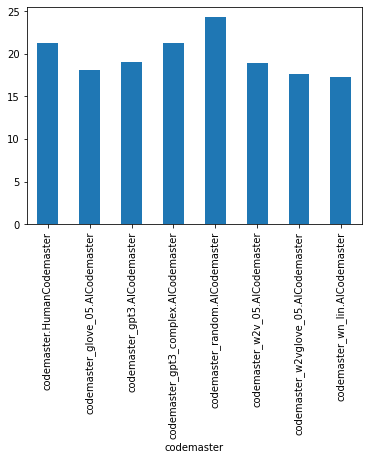

In [15]:
df.groupby('codemaster')['total_turns'].mean().plot.bar(x='codemaster', y='total_turns', rot=90)


<AxesSubplot:xlabel='guesser'>

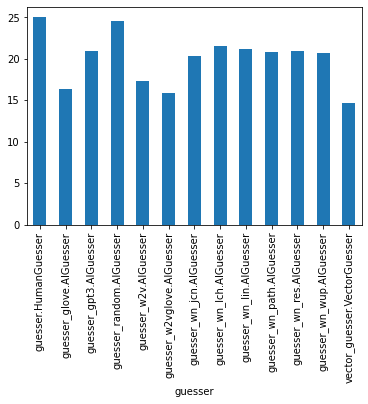

In [16]:
df.groupby('guesser')['total_turns'].mean().plot.bar(x='guesser', y='total_turns', rot=90)


In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.groupby(['guesser','codemaster'])['total_turns'].count().to_string())

guesser                       codemaster                          
guesser.HumanGuesser          codemaster_random.AICodemaster          1
guesser_glove.AIGuesser       codemaster_glove_05.AICodemaster        5
                              codemaster_gpt3.AICodemaster            2
                              codemaster_gpt3_complex.AICodemaster    3
                              codemaster_random.AICodemaster          5
                              codemaster_w2v_05.AICodemaster          3
                              codemaster_w2vglove_05.AICodemaster     4
                              codemaster_wn_lin.AICodemaster          3
guesser_gpt3.AIGuesser        codemaster_glove_05.AICodemaster        1
                              codemaster_gpt3.AICodemaster            4
                              codemaster_gpt3_complex.AICodemaster    9
                              codemaster_random.AICodemaster          2
                              codemaster_w2v_05.AICodemaster         

In [32]:
display(HTML(df.groupby(['guesser','codemaster'])['total_turns'].count().to_frame().to_html()))
